<a href="https://colab.research.google.com/github/IsWallison/Projeto_Churn_Prediction/blob/main/Projeto_Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
# Importar os modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import LabelEncoder

In [2]:
# importar os pacotes necessários
import pandas as pd

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Instruções para o modelo de churn prediction

ENTENDA O SEU PROBLEMA
* Olhar o todo e delimitar o escopo do projeto
* Como a solução vai ser usada?
* Quais são as soluções já existentes?
* Qual abordagem usar?
    * Aprendizado Supervisionado
    * Aprendizado Não Supervisionado
    * Aprendizado Por Reforço
* Qual é a métrica de performance?
* Qual a performance mínima esperada para atingir o objetivo?
* Liste as premissas básicas do projeto
* Pesquise sobre *churn rate* no Google
* Veja os serviços que outras empresas de Telecom oferecem 

EXPLORAR OS DADOS
* Estudar cada atributo e suas características:
    * Nome
    * Tipo
        * Categórica
        * Numérica
            * int
            * float
        * Estruturada
        * Não Estruturada
        * etc
    * % de valores ausentes
    * Ruído nos dados e tipo de ruído (outliers, estocásticos, erros de arredondamento)
    * Tipo de distribuição
        * Gaussiana
        * Uniforme
        * Logarítmica
        * etc
* Identificar a variável alvo (target)
* Visualizar os dados
* Estudar a correlação entre os dados
* Ver o balanceamento das classes
* Identificar as transformações que podem ser aplicadas
* Identificar os dados extras que podem ser úteis


PREPARAÇÃO DOS DADOS
* Limpeza dos Dados
    * Consertar ou remover outliers
    * Preencher os valores faltantes ou eliminar as linhas/colunas
        * Zero
        * Média
        * Mediana
        * Frequência
* Seleção de atributos
    * Eliminar os atributos (*features*) que não contêm informações úteis

* *Feature Engineering*
    * Discretizar variáveis contínuas
    * Decompor *features* (categóricas, data, tempo)
    * Aplicar transformações às variáveis
    * Agregar *features* para gerar novas
    
* *Feature Scaling*
    * Normalizar ou padronizar *features*

* Dividir entre treino, teste e validação

CONSTRUIR MODELO(S) DE MACHINE LEARNING
* Analisar as variáveis mais significativas para cada algoritmo
* *Hyperparameters Tuning* (se necessário)
* Uso de *cross-validation*
* Verificar o desempenho do(s) modelo(s) e considerar métodos *Ensemble*

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df_clean = df.copy()
df_clean = df.drop(df[df['TotalCharges']==' '].index,axis=0)
df_clean = df_clean.drop('customerID', axis=1)
df_clean['TotalCharges'] = df_clean['TotalCharges'].astype(float)

In [8]:
df_clean['Churn'] = (df_clean['Churn']== 'Yes').astype(int)
le = LabelEncoder()

for i in df_clean.columns:
  a = df_clean[f'{i}'].value_counts()

  if len(a) == 2:
    df_clean[f'{i}'] = le.fit_transform(df_clean[f'{i}'])

  elif "Yes" in a:
    df_clean[f'{i}'] = (df_clean[f'{i}']== 'Yes').astype(int)
    
df_clean = pd.get_dummies(df_clean)

In [9]:
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [107]:
df_clean.shape

(7032, 27)

In [109]:
df_clean['Churn']==1


0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: Churn, Length: 7032, dtype: bool

In [113]:
round((sum(df_clean['Churn']==1)/df_clean.shape[0]*100))

27

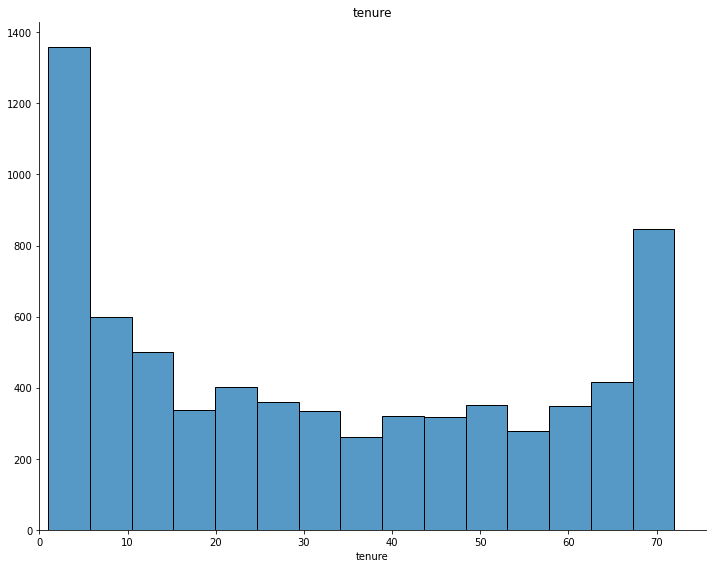

In [104]:
fig, ax = plt.subplots(figsize=(10, 8));

sns.histplot(x=df_clean['tenure'])
ax.set_title('tenure');
ax.set_ylabel('')
ax.axis(xmin=0)
total = df_clean['tenure'].value_counts()

#remover borda lateral e superior
def remove_spine(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  

remove_spine(ax)
plt.tight_layout()
plt.show()

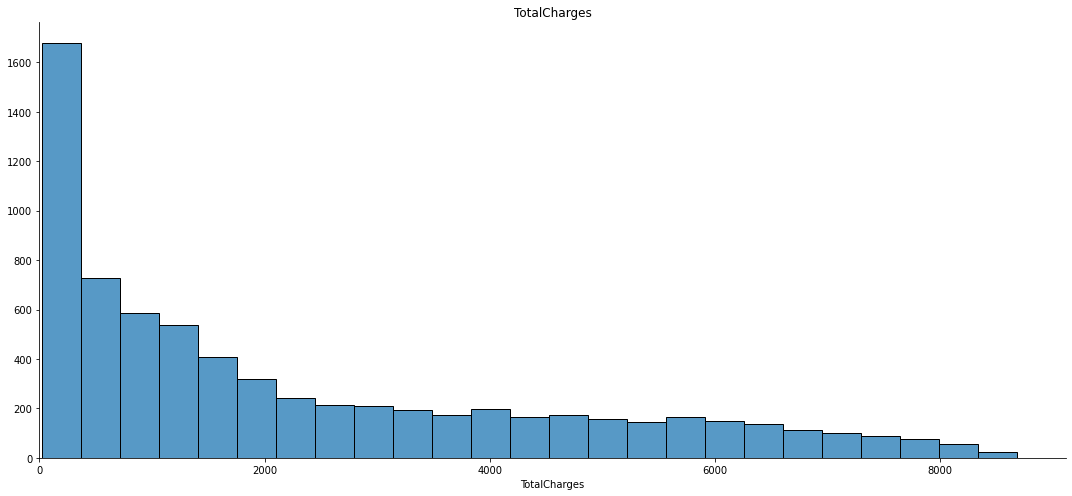

In [68]:

fig, ax = plt.subplots(figsize=(15, 7));

sns.histplot(x=df_clean['TotalCharges'])
ax.set_title('TotalCharges');
ax.set_ylabel('')
ax.axis(xmin=0)
total = df_clean['TotalCharges'].value_counts()

#remover borda lateral e superior
def remove_spine(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  

remove_spine(ax)
plt.tight_layout()
plt.show()

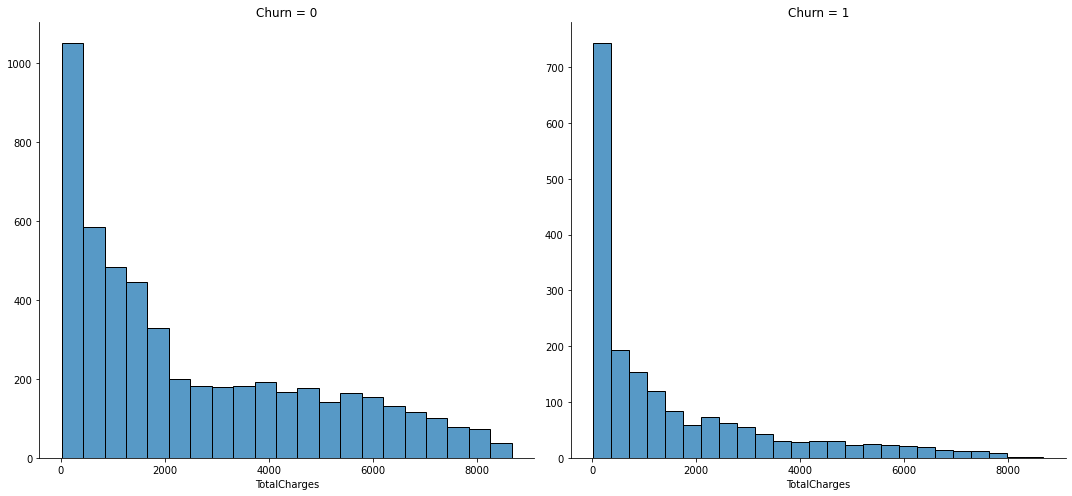

In [102]:
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

sns.histplot(x=df_clean['TotalCharges'][df_clean['Churn']==0],ax=ax1)
sns.histplot(x=df_clean['TotalCharges'][df_clean['Churn']==1],ax=ax2)
for i,Ax in enumerate([ax1,ax2]):
 Ax.set_title(f'Churn = {i}');
 Ax.spines['top'].set_visible(False)
 Ax.spines['right'].set_visible(False)
 Ax.set_ylabel('')


#ax.axis(xmin=0)
total = df_clean['TotalCharges'].value_counts()

#remover borda lateral e superior
def remove_spine(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  

#remove_spine(ax)
plt.tight_layout()
plt.show()

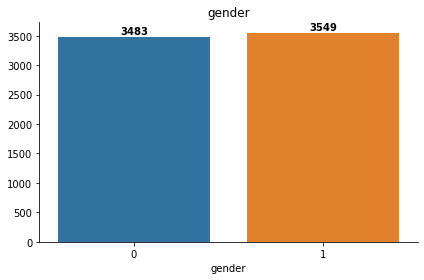

In [42]:
fig, ax = plt.subplots();

sns.countplot(x=df_clean['gender'])
ax.set_title('gender');
ax.set_ylabel('')
total = df_clean['gender'].value_counts()

#Adicionar valor na barra
for i in range(2):
  alt = int(total[i])+100
  ax.text(i, i+alt, total[i], va='center', ha='center', fontweight='bold',)

#remover borda lateral e superior
def remove_spine(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  

remove_spine(ax)
plt.tight_layout()
plt.show()

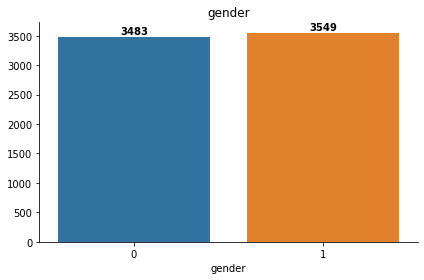

In [96]:
fig, ax = plt.subplots();

sns.countplot(x=df_clean['gender'])
ax.set_title('gender');
ax.set_ylabel('')
total = df_clean['gender'].value_counts()

#Adicionar valor na barra
for i in range(2):
  alt = int(total[i])+100
  ax.text(i, i+alt, total[i], va='center', ha='center', fontweight='bold',)

#remover borda lateral e superior
def remove_spine(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  

remove_spine(ax)
plt.tight_layout()
plt.show()

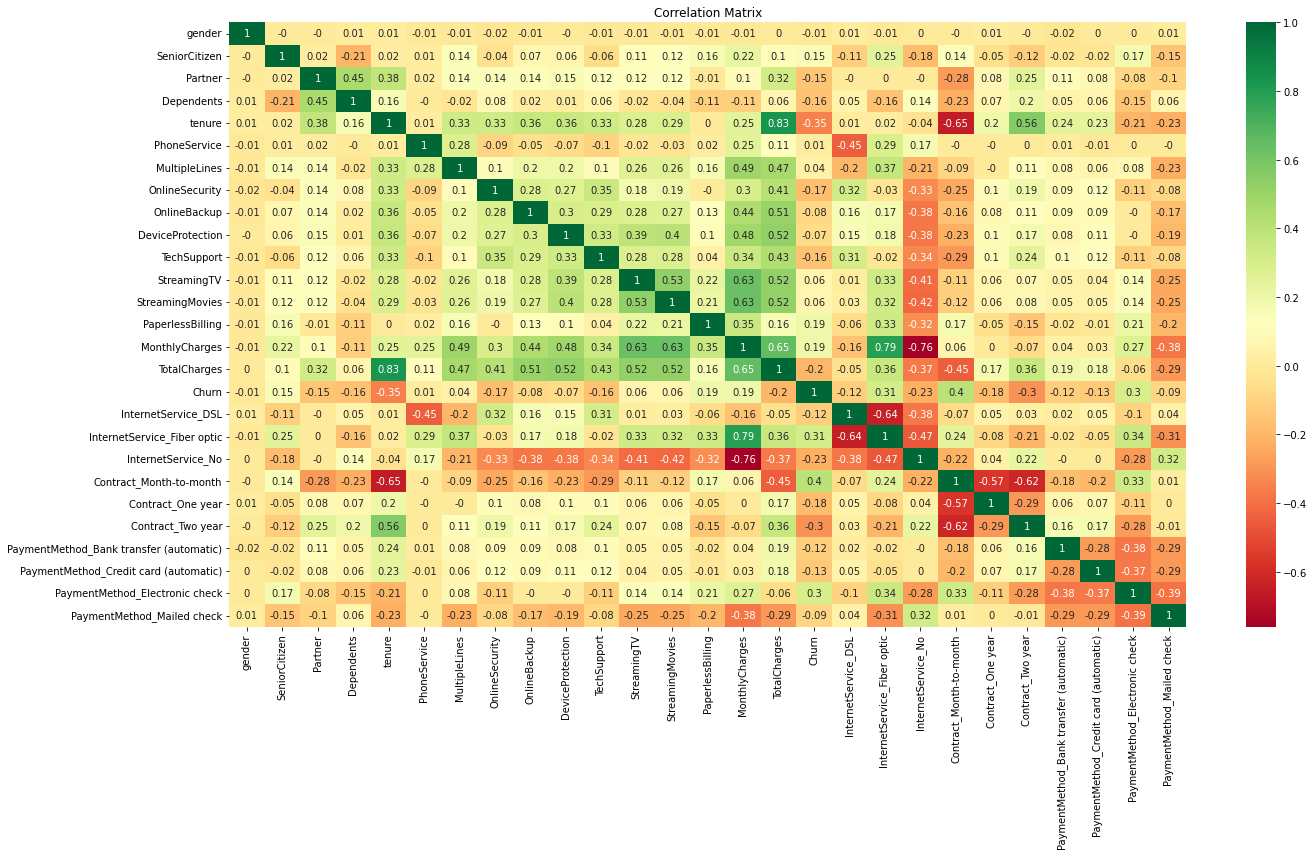

In [127]:
corr = df_clean.corr()
corr= corr.round(2)

# Create a figure and an Axes object
fig, ax = plt.subplots(figsize=(20, 12))

# Plot the heatmap
sns.heatmap(corr, cmap='RdYlGn', annot=True, ax=ax,)

# Set the title
ax.set_title("Correlation Matrix")

# Show the plot
plt.tight_layout()
plt.show()

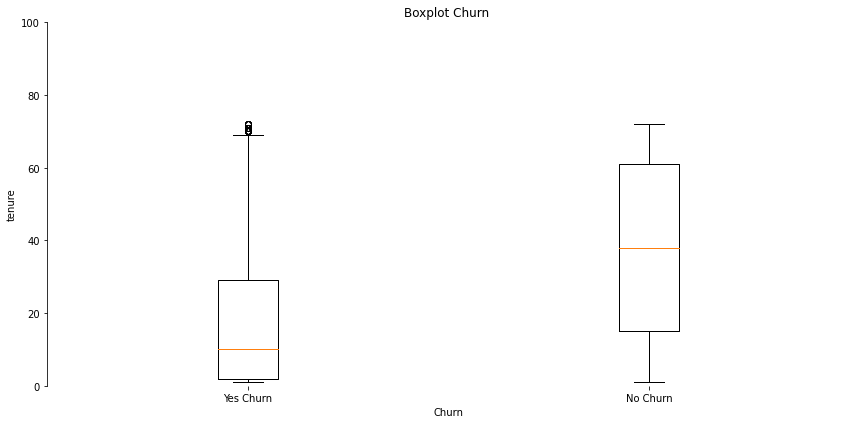

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(df_clean['tenure'][df_clean['Churn'] == 1], positions=[1])

# Plot the second box plot using the second dataset
ax.boxplot(df_clean['tenure'][df_clean['Churn'] == 0], positions=[2])

plt.subplots_adjust(wspace=100, hspace=-50)

ax.set_title("Boxplot Churn ")
ax.set_xlabel("Churn")
ax.set_ylabel("tenure")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])   # remove y-tick labels for the first subplot
plt.xticks([2, 1], ['No Churn', 'Yes Churn'])
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

n_neighbors: 8


In [161]:
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn'] 

In [18]:
# separar variáveis entre X e y com as colunas escolhidas y vai ser ser o alvo 
def transform(modelo='',X=X,y=y,oversample=False, scale=False, undersample=False):
  


  if oversample:
    oversampler = RandomOverSampler(random_state=42)
    X, y = oversampler.fit_resample(X, y)

  if scale:
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

  if undersample:
    undersampler = RandomUnderSampler(random_state=42)
    X, y = undersampler.fit_resample(X, y)

  # dividir o dataset entre treino e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y, shuffle=True)

  print('X Train : ', X_train.shape )
  print('Test : ', X_test.shape)
  print('Y Train : ', y_train.shape)
  print('y Test : ',y_test.shape)
  print('Churn 1:', sum(y==1))
  print('Churn 0: ', sum(y==0))

  if modelo != "":
    modelo.fit(X_train, y_train)

    # validar com dados de teste
    y_pred = modelo.predict(X_test)

    # Avaliação do modelo com os dados de teste comparados com os dados reais
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    accuracy = modelo.score(X_test, y_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print('Results:')
    print("MAE:", mae)
    print("RMSE:", mse)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:", conf_matrix)

  return y_pred

In [19]:

for i in range(1,50):
    y_pred_knn = transform(KNeighborsClassifier(n_neighbors=i))
    knn_accuracy = y_pred_knn.score(X_test, y_test) 
    if knn_accuracy > acc1:
        acc1 = knn_accuracy
        n_nei = i
print('n_neighbors:', n_nei)


X Train :  (5274, 26)
Test :  (1758, 26)
Y Train :  (5274,)
y Test :  (1758,)
Churn 1: 1869
Churn 0:  5163
Results:
MAE: 0.28668941979522183
RMSE: 0.28668941979522183
Accuracy: 0.7133105802047781
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1291
           1       0.46      0.47      0.46       467

    accuracy                           0.71      1758
   macro avg       0.63      0.63      0.63      1758
weighted avg       0.71      0.71      0.71      1758

Confusion Matrix: [[1036  255]
 [ 249  218]]
X Train :  (5274, 26)
Test :  (1758, 26)
Y Train :  (5274,)
y Test :  (1758,)
Churn 1: 1869
Churn 0:  5163
Results:
MAE: 0.24630261660978384
RMSE: 0.24630261660978384
Accuracy: 0.7536973833902162
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1291
           1       0.59      0.25      0.35       467

    accuracy                           0.75      1758
   macro avg      

In [167]:
knn_model = transform(KNeighborsClassifier())

X Train :  (5274, 26)
Test :  (1758, 26)
Y Train :  (5274,)
y Test :  (1758,)
Churn 1: 1869
Churn 0:  5163
Results:
MAE: 0.23094425483503983
RMSE: 0.23094425483503983
Accuracy: 0.7690557451649602
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1291
           1       0.59      0.43      0.50       467

    accuracy                           0.77      1758
   macro avg       0.70      0.66      0.67      1758
weighted avg       0.75      0.77      0.76      1758

Confusion Matrix: [[1151  140]
 [ 266  201]]


In [168]:
knn_model = transform(KNeighborsClassifier(),oversample=True)

X Train :  (7744, 26)
Test :  (2582, 26)
Y Train :  (7744,)
y Test :  (2582,)
Churn 1: 5163
Churn 0:  5163
Results:
MAE: 0.24593338497288925
RMSE: 0.24593338497288925
Accuracy: 0.7540666150271108
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1291
           1       0.73      0.81      0.77      1291

    accuracy                           0.75      2582
   macro avg       0.76      0.75      0.75      2582
weighted avg       0.76      0.75      0.75      2582

Confusion Matrix: [[ 905  386]
 [ 249 1042]]


In [170]:
knn_model = transform(KNeighborsClassifier(),undersample=True)

X Train :  (2803, 26)
Test :  (935, 26)
Y Train :  (2803,)
y Test :  (935,)
Churn 1: 1869
Churn 0:  1869
Results:
MAE: 0.31336898395721924
RMSE: 0.31336898395721924
Accuracy: 0.6866310160427808
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       467
           1       0.69      0.68      0.68       468

    accuracy                           0.69       935
   macro avg       0.69      0.69      0.69       935
weighted avg       0.69      0.69      0.69       935

Confusion Matrix: [[326 141]
 [152 316]]


In [171]:
Nb_model = transform(GaussianNB())

X Train :  (5274, 26)
Test :  (1758, 26)
Y Train :  (5274,)
y Test :  (1758,)
Churn 1: 1869
Churn 0:  5163
Results:
MAE: 0.2696245733788396
RMSE: 0.2696245733788396
Accuracy: 0.7303754266211604
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1291
           1       0.50      0.77      0.60       467

    accuracy                           0.73      1758
   macro avg       0.69      0.74      0.70      1758
weighted avg       0.79      0.73      0.74      1758

Confusion Matrix: [[926 365]
 [109 358]]


In [173]:
Nb_model = transform(GaussianNB(),oversample=True)

X Train :  (7744, 26)
Test :  (2582, 26)
Y Train :  (7744,)
y Test :  (2582,)
Churn 1: 5163
Churn 0:  5163
Results:
MAE: 0.2447714949651433
RMSE: 0.2447714949651433
Accuracy: 0.7552285050348567
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      1291
           1       0.72      0.82      0.77      1291

    accuracy                           0.76      2582
   macro avg       0.76      0.76      0.75      2582
weighted avg       0.76      0.76      0.75      2582

Confusion Matrix: [[ 888  403]
 [ 229 1062]]


In [174]:
Nb_model = transform(GaussianNB(),undersample=True)

X Train :  (2803, 26)
Test :  (935, 26)
Y Train :  (2803,)
y Test :  (935,)
Churn 1: 1869
Churn 0:  1869
Results:
MAE: 0.24385026737967913
RMSE: 0.24385026737967913
Accuracy: 0.7561497326203208
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       467
           1       0.73      0.82      0.77       468

    accuracy                           0.76       935
   macro avg       0.76      0.76      0.76       935
weighted avg       0.76      0.76      0.76       935

Confusion Matrix: [[324 143]
 [ 85 383]]


In [175]:
logist_model = transform(LogisticRegression())

X Train :  (5274, 26)
Test :  (1758, 26)
Y Train :  (5274,)
y Test :  (1758,)
Churn 1: 1869
Churn 0:  5163
Results:
MAE: 0.1945392491467577
RMSE: 0.1945392491467577
Accuracy: 0.8054607508532423
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.65      0.57      0.61       467

    accuracy                           0.81      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758

Confusion Matrix: [[1151  140]
 [ 202  265]]


In [176]:
logist_model = transform(LogisticRegression(),oversample=True)

X Train :  (7744, 26)
Test :  (2582, 26)
Y Train :  (7744,)
y Test :  (2582,)
Churn 1: 5163
Churn 0:  5163
Results:
MAE: 0.23973663826491093
RMSE: 0.23973663826491093
Accuracy: 0.7602633617350891
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1291
           1       0.74      0.81      0.77      1291

    accuracy                           0.76      2582
   macro avg       0.76      0.76      0.76      2582
weighted avg       0.76      0.76      0.76      2582

Confusion Matrix: [[ 913  378]
 [ 241 1050]]


In [177]:
logist_model = transform(LogisticRegression(),undersample=True)

X Train :  (2803, 26)
Test :  (935, 26)
Y Train :  (2803,)
y Test :  (935,)
Churn 1: 1869
Churn 0:  1869
Results:
MAE: 0.2288770053475936
RMSE: 0.2288770053475936
Accuracy: 0.7711229946524064
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       467
           1       0.75      0.82      0.78       468

    accuracy                           0.77       935
   macro avg       0.77      0.77      0.77       935
weighted avg       0.77      0.77      0.77       935

Confusion Matrix: [[339 128]
 [ 86 382]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [179]:
tree_model = transform(DecisionTreeClassifier())

X Train :  (5274, 26)
Test :  (1758, 26)
Y Train :  (5274,)
y Test :  (1758,)
Churn 1: 1869
Churn 0:  5163
Results:
MAE: 0.2616609783845279
RMSE: 0.2616609783845279
Accuracy: 0.7383390216154722
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1291
           1       0.51      0.51      0.51       467

    accuracy                           0.74      1758
   macro avg       0.66      0.67      0.67      1758
weighted avg       0.74      0.74      0.74      1758

Confusion Matrix: [[1060  231]
 [ 229  238]]


In [180]:
tree_model = transform(DecisionTreeClassifier(),oversample=True)

X Train :  (7744, 26)
Test :  (2582, 26)
Y Train :  (7744,)
y Test :  (2582,)
Churn 1: 5163
Churn 0:  5163
Results:
MAE: 0.14368706429124709
RMSE: 0.14368706429124709
Accuracy: 0.8563129357087529
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      1291
           1       0.81      0.93      0.87      1291

    accuracy                           0.86      2582
   macro avg       0.86      0.86      0.86      2582
weighted avg       0.86      0.86      0.86      2582

Confusion Matrix: [[1013  278]
 [  93 1198]]


In [181]:
tree_model = transform(DecisionTreeClassifier(),undersample=True)

X Train :  (2803, 26)
Test :  (935, 26)
Y Train :  (2803,)
y Test :  (935,)
Churn 1: 1869
Churn 0:  1869
Results:
MAE: 0.33689839572192515
RMSE: 0.33689839572192515
Accuracy: 0.6631016042780749
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       467
           1       0.65      0.71      0.68       468

    accuracy                           0.66       935
   macro avg       0.66      0.66      0.66       935
weighted avg       0.66      0.66      0.66       935

Confusion Matrix: [[290 177]
 [138 330]]
